# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jumla
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | henties bay
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | solnechnyy
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | eidsvag
Processing Record 10 of Set 1 | ambilobe
Processing Record 11 of Set 1 | boa vista
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | manta
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | halalo
City not found. Skipping...
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | samarai
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | udimskiy
Processing Record 23 of Set 1 | smith

In [39]:
city_data

[{'City': 'jumla',
  'Lat': 29.2747,
  'Lng': 82.1838,
  'Max Temp': 6.09,
  'Humidity': 87,
  'Cloudiness': 60,
  'Wind Speed': 0.66,
  'Country': 'NP',
  'Date': 1680558756},
 {'City': 'hofn',
  'Lat': 64.2539,
  'Lng': -15.2082,
  'Max Temp': 7.84,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 11.93,
  'Country': 'IS',
  'Date': 1680558756},
 {'City': 'henties bay',
  'Lat': -22.116,
  'Lng': 14.2845,
  'Max Temp': 16.76,
  'Humidity': 82,
  'Cloudiness': 0,
  'Wind Speed': 2.44,
  'Country': 'NA',
  'Date': 1680558756},
 {'City': 'sitka',
  'Lat': 57.0531,
  'Lng': -135.33,
  'Max Temp': 5.94,
  'Humidity': 61,
  'Cloudiness': 20,
  'Wind Speed': 2.57,
  'Country': 'US',
  'Date': 1680558756},
 {'City': 'solnechnyy',
  'Lat': 50.7214,
  'Lng': 136.6319,
  'Max Temp': 1.97,
  'Humidity': 72,
  'Cloudiness': 100,
  'Wind Speed': 3.88,
  'Country': 'RU',
  'Date': 1680558756},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 14.47,
  'Humidity': 49,
  'Cl

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [41]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jumla,29.2747,82.1838,6.09,87,60,0.66,NP,1680558756
1,hofn,64.2539,-15.2082,7.84,95,100,11.93,IS,1680558756
2,henties bay,-22.1160,14.2845,16.76,82,0,2.44,NA,1680558756
3,sitka,57.0531,-135.3300,5.94,61,20,2.57,US,1680558756
4,solnechnyy,50.7214,136.6319,1.97,72,100,3.88,RU,1680558756
...,...,...,...,...,...,...,...,...,...
570,sabancuy,18.9667,-91.1833,33.76,44,72,2.26,MX,1680558794
571,hof,50.3167,11.9167,-0.14,63,100,21.90,DE,1680558794
572,san ramon,37.7799,-121.9780,14.56,41,0,7.20,US,1680558503
573,burnie,-41.0667,145.9167,10.52,96,100,1.46,AU,1680558564


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jumla,29.2747,82.1838,6.09,87,60,0.66,NP,1680558756
1,hofn,64.2539,-15.2082,7.84,95,100,11.93,IS,1680558756
2,henties bay,-22.1160,14.2845,16.76,82,0,2.44,NaN,1680558756
3,sitka,57.0531,-135.3300,5.94,61,20,2.57,US,1680558756
4,solnechnyy,50.7214,136.6319,1.97,72,100,3.88,RU,1680558756


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

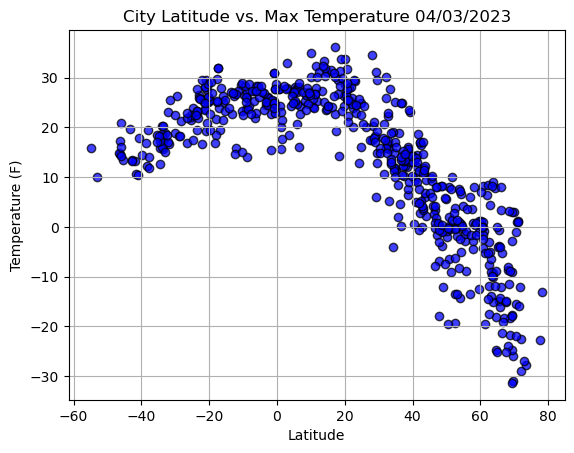

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o",facecolors="blue", edgecolors="black", alpha=0.75 )

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

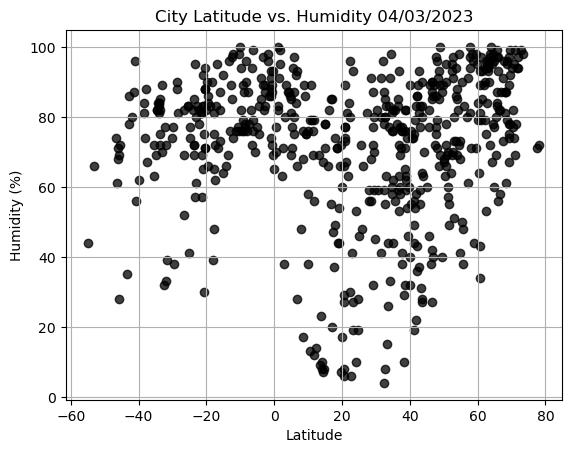

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o",facecolors="black", edgecolors="black", alpha=0.75 )

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

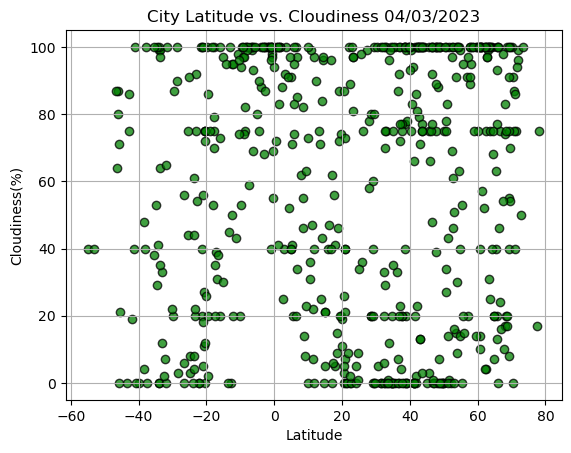

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

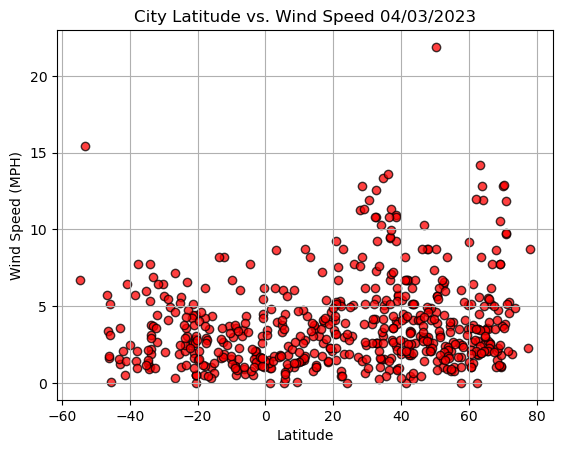

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y):
    slope, inter, r, p, std_err = linregress(x, y)
    fit = slope * x + inter
    line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
    plt.scatter(x,y)
    plt.plot(x,fit,"r-")
    plt.annotate(line, (5, 0), fontsize=15,color="red")
    plt.annotate(line, (-20, 5), fontsize=15,color="red")
    print(f"The r-value is: {r}")

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemis = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[northern_hemis]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jumla,29.2747,82.1838,6.09,87,60,0.66,NP,1680558756
1,hofn,64.2539,-15.2082,7.84,95,100,11.93,IS,1680558756
3,sitka,57.0531,-135.3300,5.94,61,20,2.57,US,1680558756
4,solnechnyy,50.7214,136.6319,1.97,72,100,3.88,RU,1680558756
5,bethel,41.3712,-73.4140,14.47,49,0,6.69,US,1680558756


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemis = city_data_df["Lat"] <= 0
southern_hemi_df = city_data_df.loc[southern_hemis]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,henties bay,-22.1160,14.2845,16.76,82,0,2.44,NaN,1680558756
6,east london,-33.0153,27.9116,18.83,70,33,6.88,ZA,1680558756
7,ushuaia,-54.8000,-68.3000,15.81,44,40,6.69,AR,1680558756
9,ambilobe,-13.2000,49.0500,22.72,96,45,1.60,MG,1680558757
11,port alfred,-33.5906,26.8910,17.32,85,64,3.13,ZA,1680558757


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8738864736678109


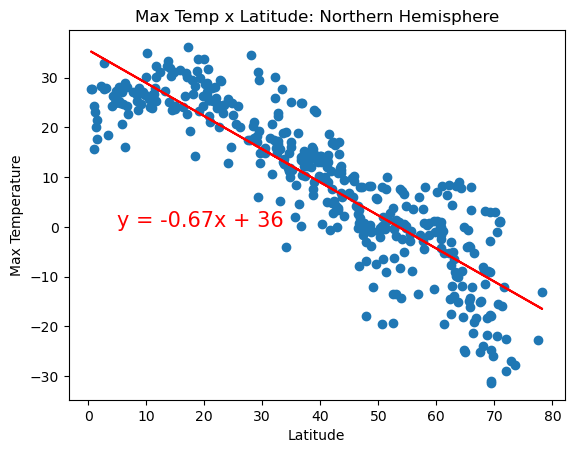

In [68]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
lin_reg_plot(x,y)
plt.title("Max Temp x Latitude: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

The r-value is: 0.6860698434459818


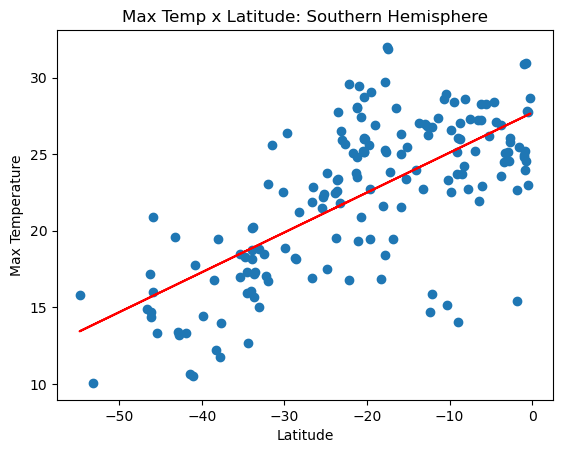

In [69]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
lin_reg_plot(x,y)
plt.title("Max Temp x Latitude: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

**Discussion about the linear relationship:** Based on the data, there is a relationship between the Max Temperature and the Latitude in that it reaches highest temperatures as we approach 0 latitude. This can be seen with the real life situation that it gets warmer as we approach the equator, which supports our thought based on the data.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.31335840279872285


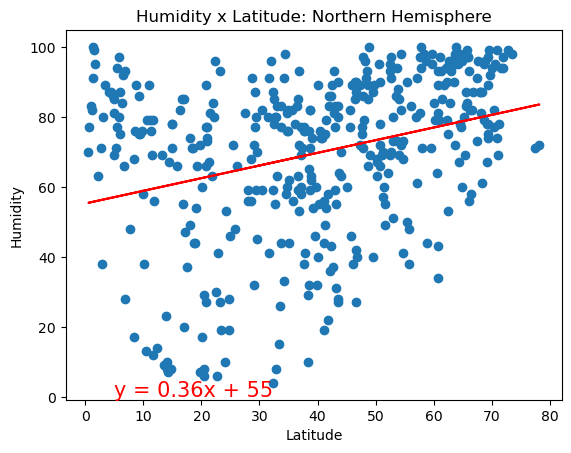

In [78]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lin_reg_plot(x,y)
plt.title("Humidity x Latitude: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.38076770341373906


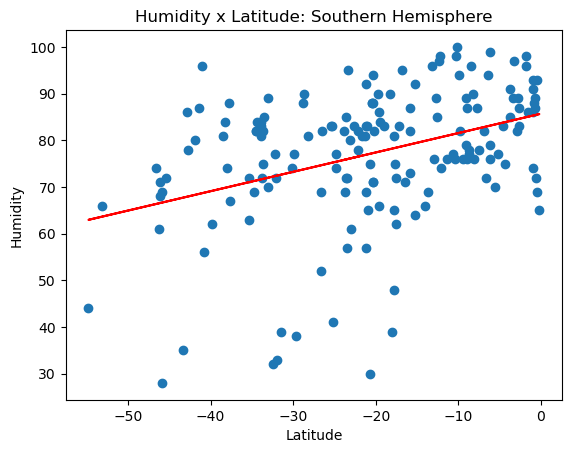

In [77]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lin_reg_plot(x,y)
plt.title("Humidity x Latitude: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** There doesn't seem to be a relationship between Max Temperature and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11753334139285312


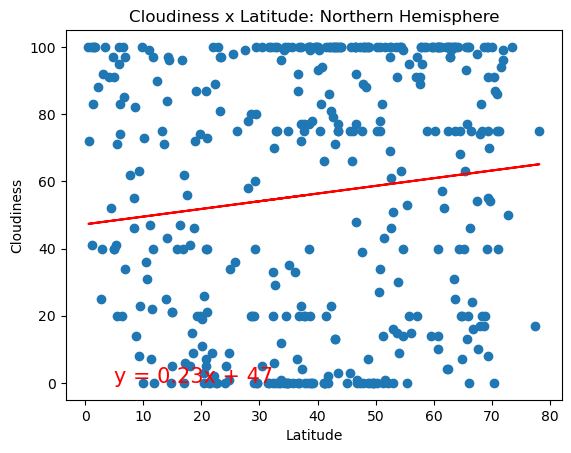

In [76]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
lin_reg_plot(x,y)
plt.title("Cloudiness x Latitude: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.4025380929068836


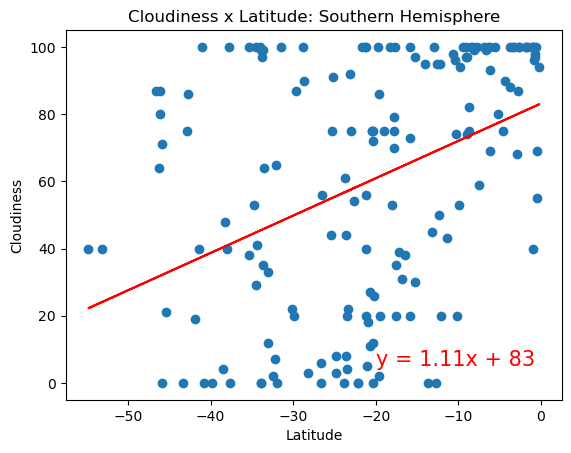

In [75]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lin_reg_plot(x,y)
plt.title("Cloudiness x Latitude: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** I do not think there is direct relationship because there are plots everywhere, but the r-value and slope suggests a correlation with increasing latitude with increasing cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11886591068617824


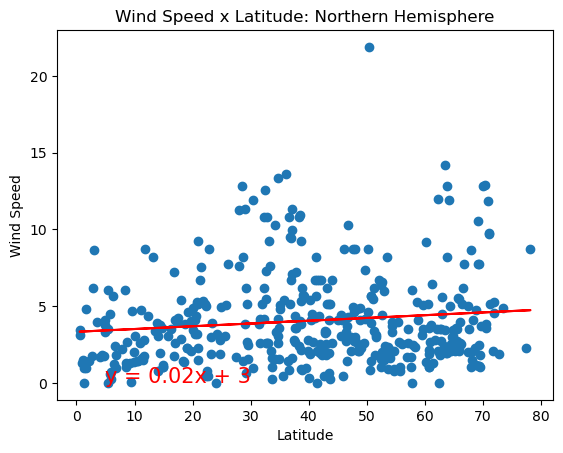

In [79]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lin_reg_plot(x,y)
plt.title("Wind Speed x Latitude: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.22482743600666322


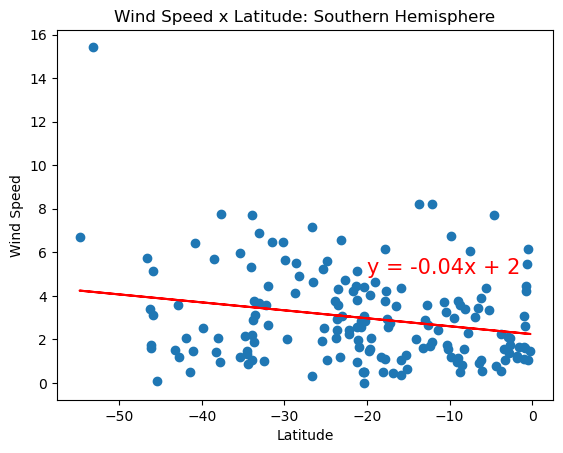

In [80]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lin_reg_plot(x,y)
plt.title("Wind Speed x Latitude: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Based on the data, it seems that there seems to be an inverse relationship between windspeed and latitude. It seems that the further away from the equator we are, the higher the windspeed can be. However, it seems that there is little relationship between the two based on the slopes.